In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

import os
import sys
import time

from tensorflow import keras
from tensorflow.keras.models import Sequential
from numpy import array

for module in [matplotlib, np, sklearn, pd, tf]:
    print(module.__name__, module.__version__)

matplotlib 3.2.1
numpy 1.18.2
sklearn 0.21.2
pandas 1.0.3
tensorflow 2.2.0-rc1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# 数据集中共有6w个样本 用前5000个样本作为验证集, 后5.5w个样本作为训练集
x_valid, x_train = x_train_all[: 5000], x_train_all[5000: ]
y_valid, y_train = y_train_all[: 5000], y_train_all[5000: ]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 14s 3us/step

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape([-1, 1])).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape([-1, 1])).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape([-1, 1])).reshape(-1, 28, 28)

In [7]:
model: Sequential = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
    
# relu: y = max(0, x)
# softmax: 将向量变成概率分布 x = [x1, x2, x3]
#       y = [[e^x1/sum, e^x2/sum, e^x3/sum], sum=e^x1+e^x2+e^x3]

# reason for sparse: y->index, y->onehot->[]
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)



In [8]:
# Tensorboard, EarlyStopping, ModelCheckPoint
logdir = "./callbacks_dnn"
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")


callbacks: list = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]


history = model.fit(
    x_train_scaled, 
    y_train, epochs=10, 
    validation_data=(x_valid_scaled, y_valid),
    callbacks=callbacks
)

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8474 - accuracy: 0.6555 - val_loss: 0.7100 - val_accuracy: 0.7594

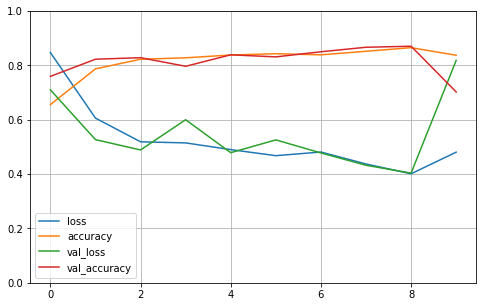

In [9]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curve(history)

In [10]:
result = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 74.1547 - accuracy: 0.3233